In [1]:
import pandas as pd
import matplotlib.pyplot as plt

snp = pd.read_csv("SNP500.csv",  usecols = ['Date','Open', 'Adj Close'] )
amzn = pd.read_csv("Amazon.csv", usecols = ['Date','Open', 'Adj Close'])
wmt = pd.read_csv("Walmart.csv", usecols = ['Date','Open', 'Adj Close'])
pfz = pd.read_csv("Pfizer.csv", usecols = ['Date','Open', 'Adj Close'])

In [2]:
snp.shape

(52, 3)

In [3]:
amzn.shape

(52, 3)

In [4]:
wmt.shape

(52, 3)

In [5]:
snp.head()

,Date,Open,Adj Close
0,2019-01-01,2476.959961,2549.689941
1,2019-01-08,2568.110107,2582.610107
2,2019-01-15,2585.100098,2670.709961
3,2019-01-22,2657.879883,2643.850098
4,2019-01-29,2644.889893,2724.870117


In [6]:
pfz.shape

(52, 3)

In [7]:
snp.describe()

,Open,Adj Close
count,52.000000,52.000000
mean,2903.984798,2916.866352
std,156.201043,152.702847
min,2476.959961,2549.689941
25%,2818.255066,2822.512574
50%,2911.125000,2925.054931
75%,2997.359924,3000.149964
max,3225.449951,3224.010010


In [8]:
snp.dtypes

Date          object
Open         float64
Adj Close    float64
dtype: object

In [9]:
snp_chg = snp['Adj Close'].pct_change()
amzn_chg= amzn['Adj Close'].pct_change()
wmt_chg = wmt['Adj Close'].pct_change()
pfz_chg = pfz['Adj Close'].pct_change()

In [10]:
snp_chg

0          NaN
1     0.012911
2     0.034113
3    -0.010057
4     0.030645
5    -0.005531
6     0.024282
7     0.007389
8    -0.001180
9    -0.003405
10    0.017835
11   -0.012206
12    0.024596
13    0.009968
14    0.003388
15    0.000823
16    0.012057
17   -0.003588
18   -0.041126
19    0.010086
20   -0.004989
21   -0.028878
22    0.051843
23    0.001018
24    0.019269
25    0.006444
26    0.003920
27    0.012887
28   -0.009710
29    0.012040
30   -0.058336
31    0.013344
32    0.014205
33   -0.015484
34    0.016704
35    0.017759
36    0.006557
37   -0.002061
38   -0.005027
39   -0.012749
40    0.009310
41    0.013678
42    0.010876
43    0.012782
44    0.002839
45    0.011344
46    0.003719
47   -0.006309
48    0.007094
49    0.017695
50    0.010202
51   -0.000844
Name: Adj Close, dtype: float64

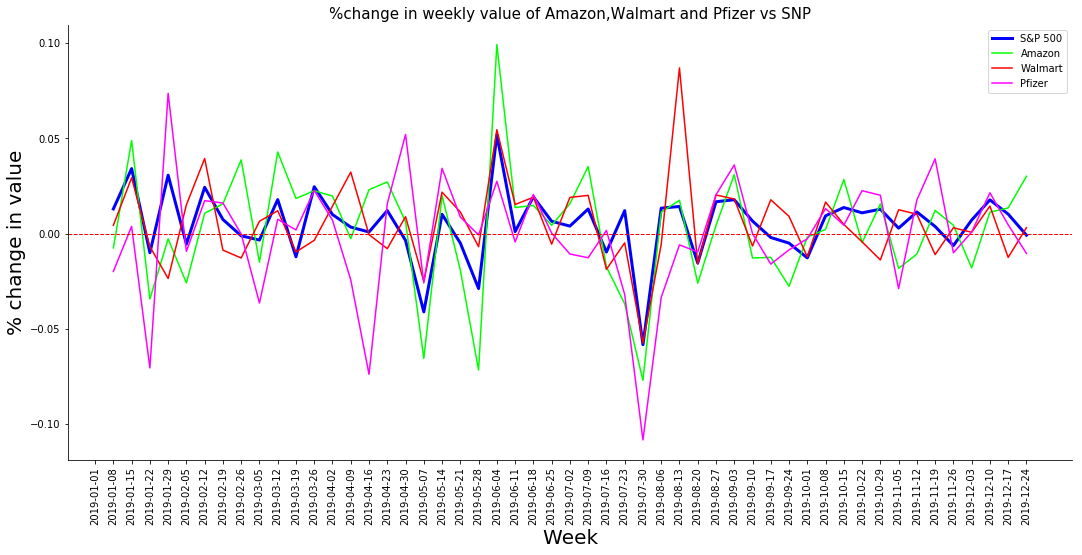

In [15]:
plt.figure(figsize=(18,8)) #figsize determines the size of figure in inches
#plt.box(False) #removes all the spines around the plot

# Remove "top" and "right" border (spines in matplotlib) / gca is "get current axis"(matplotlib function)
plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)

#Make line plot for S&P, Amazon, Pfizer and Walmart values
plt.plot(snp['Date'], snp_chg, color='blue', lw = 3, label="S&P 500") #lw is "linewidth"
plt.plot(amzn['Date'], amzn_chg,color='lime', label="Amazon")
plt.plot(wmt['Date'], wmt_chg, color='red', label="Walmart")
plt.plot(pfz['Date'], pfz_chg, color='fuchsia', label="Pfizer")

plt.title('%change in weekly value of Amazon,Walmart and Pfizer vs SNP', fontsize =15) #to write title of the plot

plt.xlabel('Week',fontsize = 20) #x-axis label
plt.ylabel('% change in value', fontsize = 20)#y-axis label
plt.legend()

plt.axhline(linewidth=1, ls ='--', color='r') #line parallel to horizontal axis
plt.xticks(rotation=90) #rotate the ticks value to make vertical
plt.show()

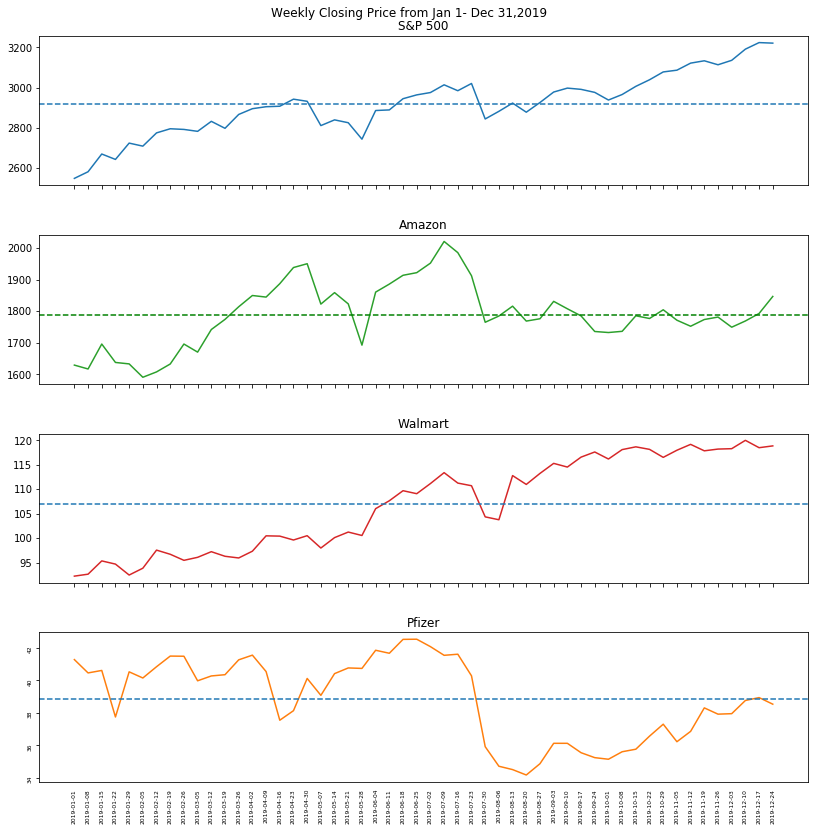

In [13]:
#subplots() without arguments returns a Figure and a single Axes.
#The first two optional arguments of pyplot.subplots define the number of rows and columns of the subplot grid.
#sharex: x axis shared by all subplots

#.subplots returns 2 things - figure and axes. All changes related to figure will be done using "fig" and its functions 
# and ALL changes associated with axes are done using axis name
#could have done axs also and axs[0], axs[1],axs[2] and axs[3] would have been used to refer the axes

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, figsize=(12,12))
fig.suptitle('Weekly Closing Price from Jan 1- Dec 31,2019')

ax1.plot(snp['Date'],snp['Adj Close'])
ax1.set_title('S&P 500')
ax1.axhline(y=snp['Adj Close'].mean(), ls="--") #line parallel to horizontal axis

ax2.plot(amzn['Date'],amzn['Adj Close'], 'tab:green')
ax2.set_title('Amazon')
ax2.axhline(y=amzn['Adj Close'].mean(), ls="--", c="g") #line parallel to horizontal axis

ax3.plot(wmt['Date'],wmt['Adj Close'], 'tab:red')
ax3.set_title('Walmart')
ax3.axhline(y=wmt['Adj Close'].mean(), ls="--") #line parallel to horizontal axis

ax4.plot(pfz['Date'],pfz['Adj Close'], 'tab:orange')
ax4.set_title('Pfizer')
ax4.axhline(y=pfz['Adj Close'].mean(), ls="--") #line parallel to horizontal axis

for ax in fig.get_axes():
    ax.label_outer()

# options for x-axis tick(size, alignment, bottom= false for no tick marks etc)
ax4.tick_params(labelrotation=90,labelsize=6, bottom=False)

# Hide x labels and tick labels for top plots and y ticks for right plots.
fig.tight_layout(pad=3.0)

fig.savefig('ClosePrice.png')

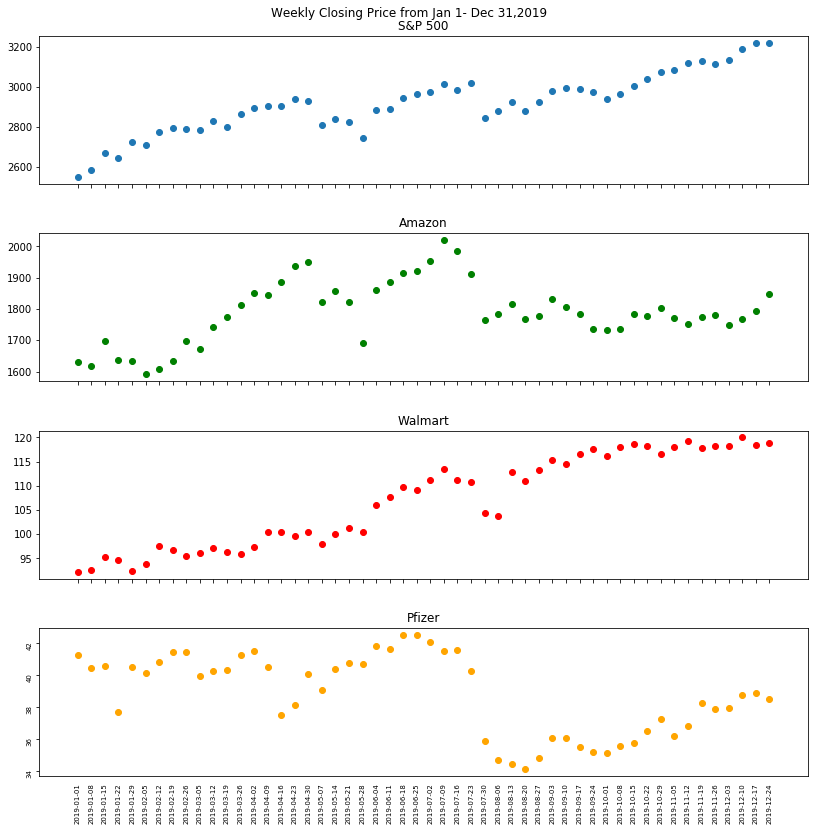

In [14]:
fig, axs = plt.subplots(4, sharex=True, figsize=(12,12))
fig.suptitle('Weekly Closing Price from Jan 1- Dec 31,2019')

axs[0].scatter(snp['Date'],snp['Adj Close'])
axs[0].set_title('S&P 500')

axs[1].scatter(amzn['Date'],amzn['Adj Close'], c='green')
axs[1].set_title('Amazon')

axs[2].scatter(wmt['Date'],wmt['Adj Close'], c='red')
axs[2].set_title('Walmart')

axs[3].scatter(pfz['Date'],pfz['Adj Close'], c='orange')
axs[3].set_title('Pfizer')


# options for x-axis tick(size, alignment, bottom= false for no tick marks etc)
axs[3].tick_params(labelrotation=90,labelsize=7, bottom=False)

# to create space between each subplot
fig.tight_layout(pad=3.0)

# save the figure in a png file
fig.savefig('ClosePrice_Scatter.png')